In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [5]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

Load model


In [6]:
countries_of_interest = [country for country in masia.countries_ASEAN if country not in ['BRN','SGP']]
                         
instruments = [[f'{country}_GCARBR_A'] for country in countries_of_interest]
target_var  = [f'{country}_CO2' for country in countries_of_interest]
delay = 
target_growth = 1.01

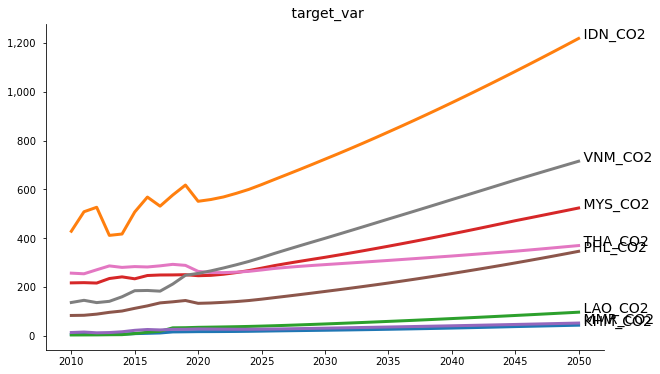

In [11]:
model.plot_basis('target_var',df = masia.basedf.loc[2010:,target_var],trans=masia.var_description,legend=0);

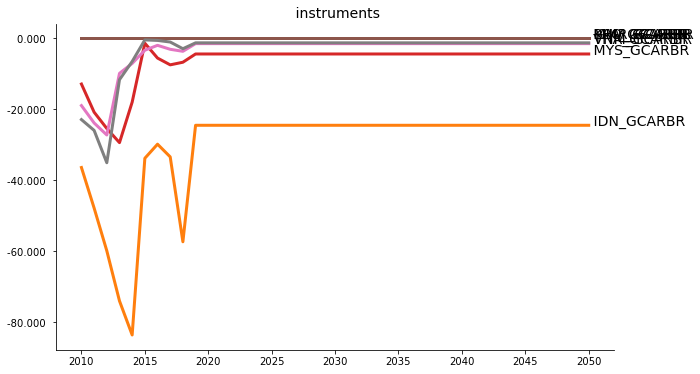

In [52]:
model.plot_basis('instruments',df = masia.basedf.loc[2010:,[i[0][:-2] for i in instruments]],trans=masia.var_description,legend=0);

In [12]:
[i[0] for i in instruments]

['KHM_GCARBR_A',
 'IDN_GCARBR_A',
 'LAO_GCARBR_A',
 'MYS_GCARBR_A',
 'MMR_GCARBR_A',
 'PHL_GCARBR_A',
 'THA_GCARBR_A',
 'VNM_GCARBR_A']

In [13]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 0,silent=1)

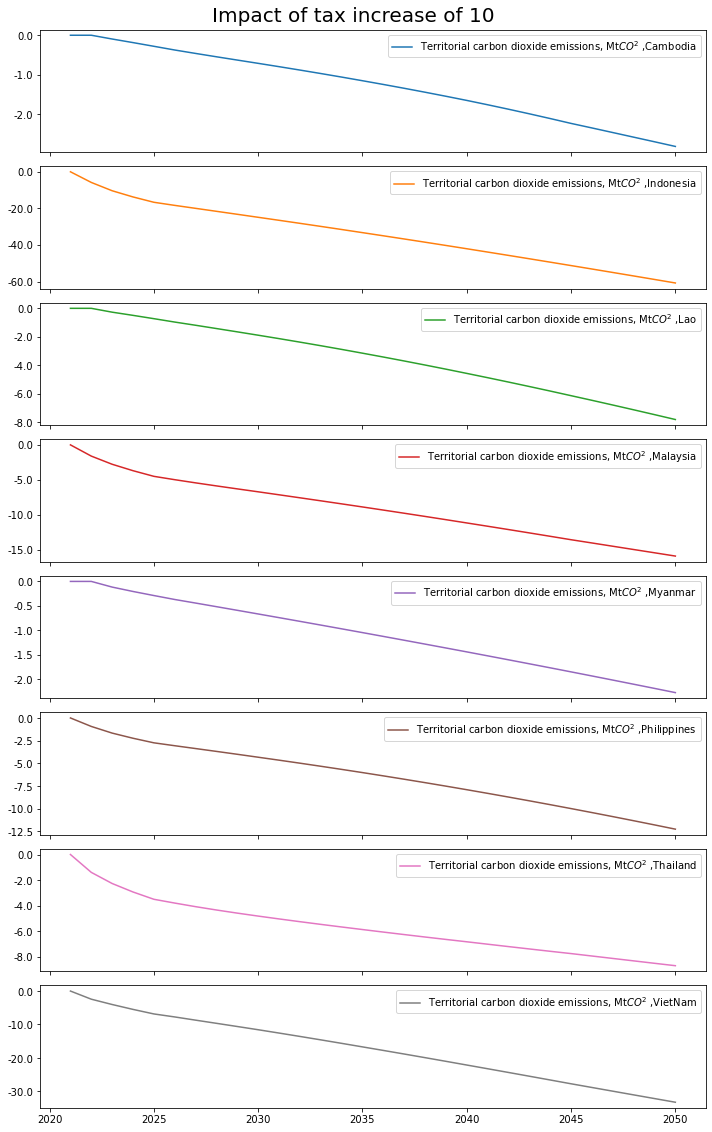

In [14]:
masia[target_var].dif.rename().plot(colrow  = 1,title = 'Impact of tax increase of 10 ',top=0.96,sharey=0);
masia[target_var].dif.df;
    

In [15]:
target_before = baseline[target_var].loc[2022+delay-1:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * (1+{target_growth}/100)' for t in target_var)
print(calclines)

target = target_before.mfcalc(calclines)

KHM_CO2 = KHM_CO2(-1) * (1+1.01/100)
IDN_CO2 = IDN_CO2(-1) * (1+1.01/100)
LAO_CO2 = LAO_CO2(-1) * (1+1.01/100)
MYS_CO2 = MYS_CO2(-1) * (1+1.01/100)
MMR_CO2 = MMR_CO2(-1) * (1+1.01/100)
PHL_CO2 = PHL_CO2(-1) * (1+1.01/100)
THA_CO2 = THA_CO2(-1) * (1+1.01/100)
VNM_CO2 = VNM_CO2(-1) * (1+1.01/100)


In [46]:
if 0:
    t = pd.concat([target_before.rename(columns={}),target.rename(columns={})],axis=1)
    t.plot()
    print(target_before.pct_change())
    print(target)

In [18]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=10,defaultconv=0.5,varimpulse=True,nonlin=4,silent=0)

In [19]:
t_i.debug=0
res = t_i(delay=delay,shortfall=0)

Update jacobi: 2022 effects from 2021
Period: 2022
Period: 2022  Target instrument iteration: 0
Period: 2023
Period: 2023  Target instrument iteration: 0
Period: 2023  Target instrument iteration: 1
Period: 2023  Target instrument iteration: 2
Period: 2024
Period: 2024  Target instrument iteration: 0
Period: 2024  Target instrument iteration: 1
Period: 2024  Target instrument iteration: 2
Period: 2024  Target instrument iteration: 3
Period: 2025
Period: 2025  Target instrument iteration: 0
Period: 2025  Target instrument iteration: 1
Period: 2025  Target instrument iteration: 2
Period: 2025  Target instrument iteration: 3
Period: 2025  Target instrument iteration: 4
Update jacobi: 2025 effects from 2024
Period: 2025  Target instrument iteration: 5
Period: 2026
Period: 2026  Target instrument iteration: 0
Period: 2026  Target instrument iteration: 1
Period: 2026  Target instrument iteration: 2
Period: 2026  Target instrument iteration: 3
Period: 2026  Target instrument iteration: 4
Upda

Update jacobi: 2040 effects from 2039
Period: 2040  Target instrument iteration: 9
Period: 2040  Target instrument iteration: 10
Period: 2041
Period: 2041  Target instrument iteration: 0
Period: 2041  Target instrument iteration: 1
Period: 2041  Target instrument iteration: 2
Period: 2041  Target instrument iteration: 3
Period: 2041  Target instrument iteration: 4
Update jacobi: 2041 effects from 2040
Period: 2041  Target instrument iteration: 5
Period: 2041  Target instrument iteration: 6
Period: 2041  Target instrument iteration: 7
Period: 2041  Target instrument iteration: 8
Update jacobi: 2041 effects from 2040
Period: 2041  Target instrument iteration: 9
Period: 2041  Target instrument iteration: 10
Period: 2042
Period: 2042  Target instrument iteration: 0
Period: 2042  Target instrument iteration: 1
Period: 2042  Target instrument iteration: 2
Period: 2042  Target instrument iteration: 3
Period: 2042  Target instrument iteration: 4
Update jacobi: 2042 effects from 2041
Period: 20

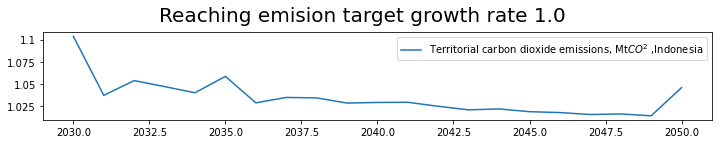

In [43]:
with masia.set_smpl(2030,2050):

    masia['IDN_co2'].pct.mul100.rename().plot(title=f'Reaching emision target growth rate {target_growth:,.1f}',colrow=1,top=0.8);

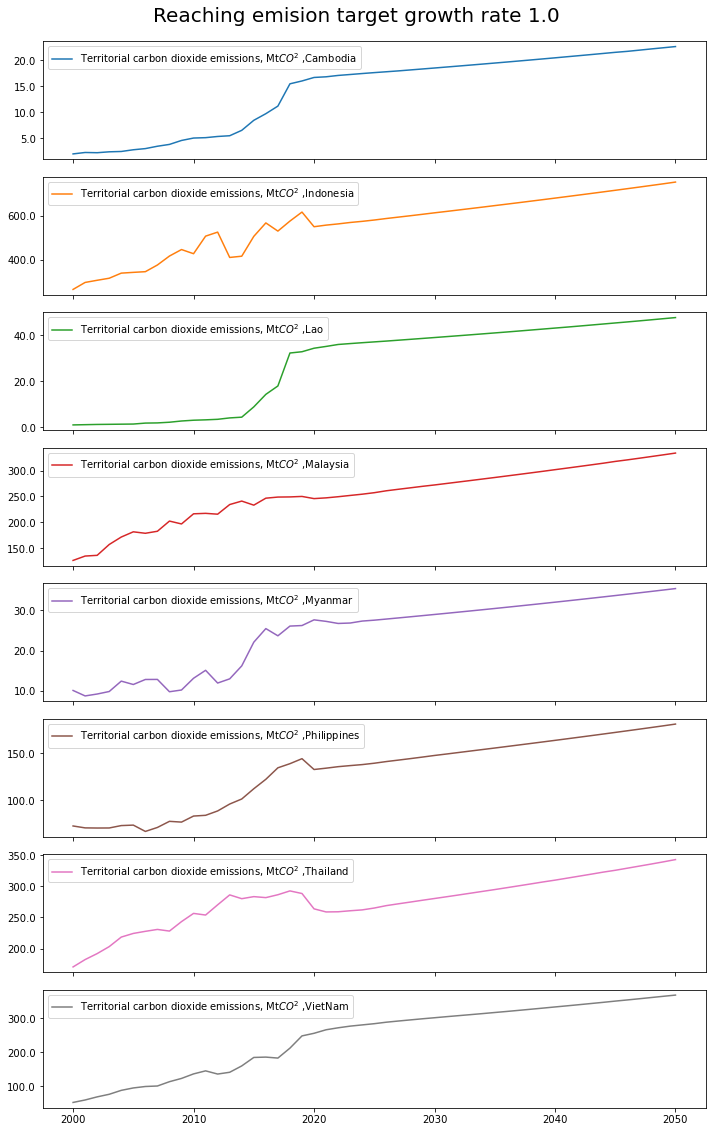

In [59]:
with masia.set_smpl(2000,2050):
    masia[' '.join([f'{country}_co2' for country in countries_of_interest])].rename().plot(title=f'Reaching emision target growth rate {target_growth:,.1f}'
                                                                                           ,top=0.95,colrow=1,sharey=0);

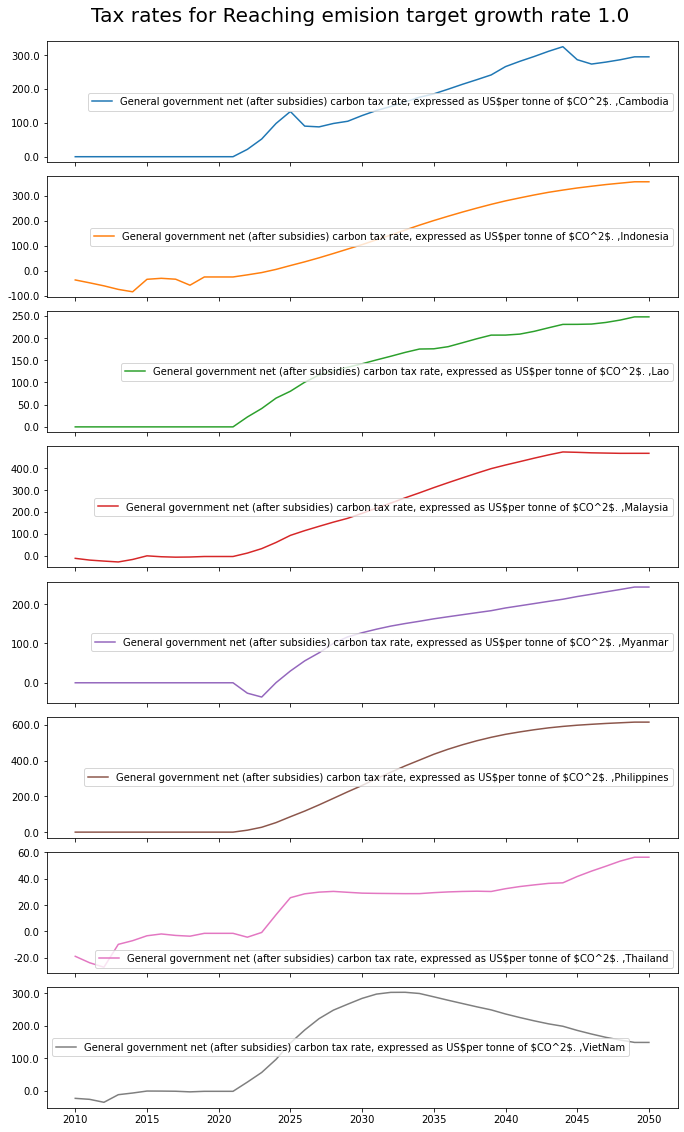

In [58]:
with masia.set_smpl(2010,2050):
   masia[' '.join([f'{country}_GCARBR' for country in countries_of_interest])].rename().plot(title=f'Tax rates for Reaching emision target growth rate {target_growth:,.1f}'
                                                                                           ,top=0.95,colrow=1,sharey=0);

In [ ]:
masia['IDN_share*'].df

# Tax in each country 

In [ ]:
masia.exodif().rename(columns=masia.var_description).T

# World reduction 

# ASEAN reduction

In [ ]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


In [ ]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)


# not used  

In [ ]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') 
                       and  var.split('_')[0] in masia.countries_ASEAN ]

In [ ]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))